Analysis using Matplotlib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Task 1 (Line Plot)

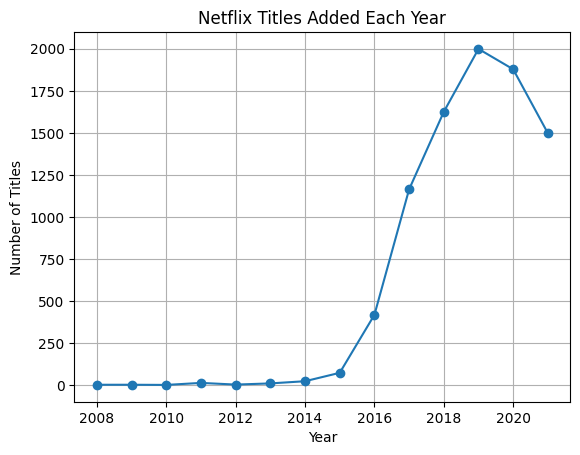

In [3]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
yearly_counts = df['year_added'].value_counts().sort_index()
plt.plot(yearly_counts.index, yearly_counts.values, marker='o')
plt.title("Netflix Titles Added Each Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()

Task 2 (Bar Plot)

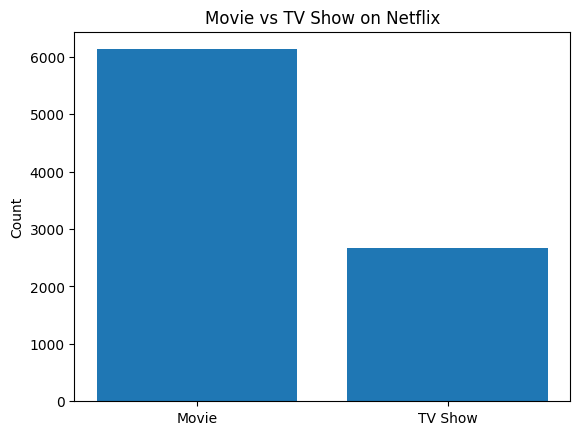

In [5]:
type_counts = df['type'].value_counts()
plt.bar(type_counts.index, type_counts.values)
plt.title("Movie vs TV Show on Netflix")
plt.ylabel("Count")
plt.show()

Task 3 (Pie Chart)

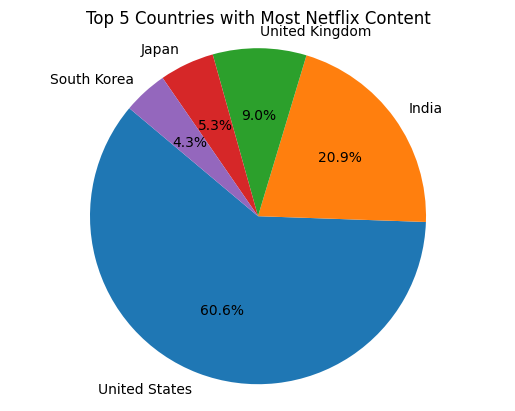

In [6]:
country_counts = df['country'].dropna().value_counts().head(5)
plt.pie(country_counts.values, labels=country_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 5 Countries with Most Netflix Content")
plt.axis('equal')
plt.show()


Task 4 (Box Plot)

C:\Users\karti\AppData\Local\Temp\ipykernel_17920\1231929331.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['duration'] = movie_df['duration'].str.replace(' min', '').astype(float)


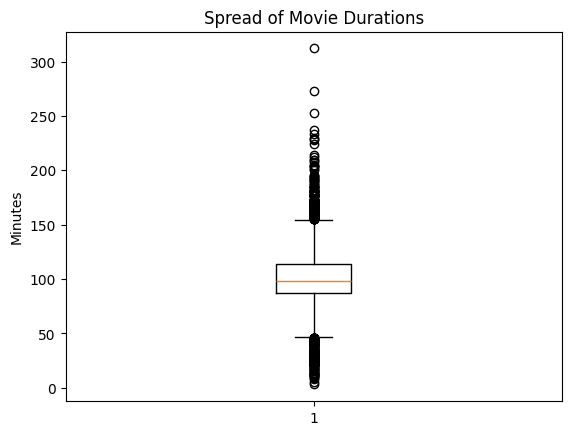

In [7]:
movie_df = df[df['type'] == 'Movie']
movie_df['duration'] = movie_df['duration'].str.replace(' min', '').astype(float)

plt.boxplot(movie_df['duration'].dropna())
plt.title("Spread of Movie Durations")
plt.ylabel("Minutes")
plt.show()


Task 5

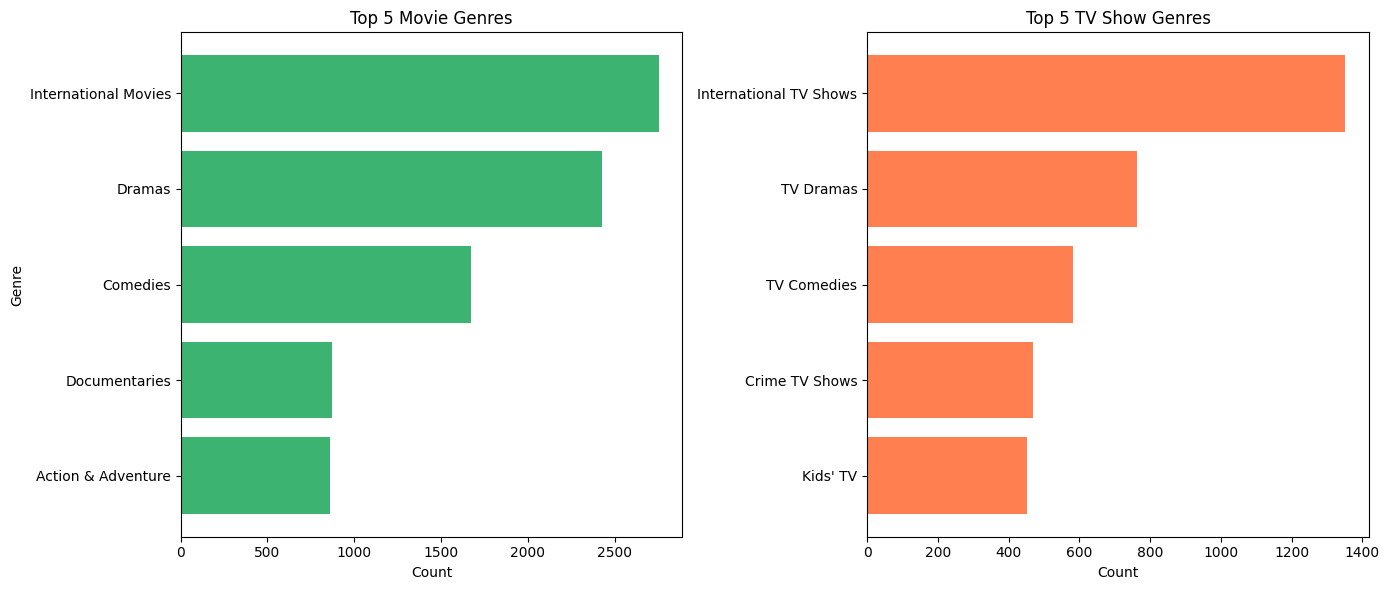

In [8]:
df = df.dropna(subset=['listed_in', 'type'])
movies = df[df['type'] == 'Movie']
tv_shows = df[df['type'] == 'TV Show']
movies_genres = movies['listed_in'].str.split(', ').explode()
tv_genres = tv_shows['listed_in'].str.split(', ').explode()
top5_movies = movies_genres.value_counts().head(5)
top5_tv = tv_genres.value_counts().head(5)
fig, axes = plt.subplots(1, 2, figsize=(14,6))
axes[0].barh(top5_movies.index[::-1], top5_movies.values[::-1], color='mediumseagreen')
axes[0].set_title('Top 5 Movie Genres')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Genre')
axes[1].barh(top5_tv.index[::-1], top5_tv.values[::-1], color='coral')
axes[1].set_title('Top 5 TV Show Genres')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('')
plt.tight_layout()
plt.show()

Task 6

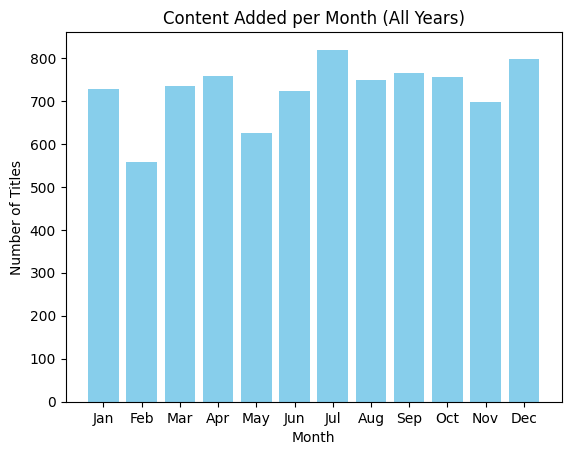

In [9]:
df['month_added'] = df['date_added'].dt.month
monthly_counts = df['month_added'].value_counts().sort_index()
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.bar(months, monthly_counts.values, color='skyblue')
plt.title("Content Added per Month (All Years)")
plt.xlabel("Month")
plt.ylabel("Number of Titles")
plt.show()

Task 7

C:\Users\karti\AppData\Local\Temp\ipykernel_17920\2969744109.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_df['seasons'] = tv_df['duration'].str.replace(' Season', '').str.replace('s', '').astype(float)


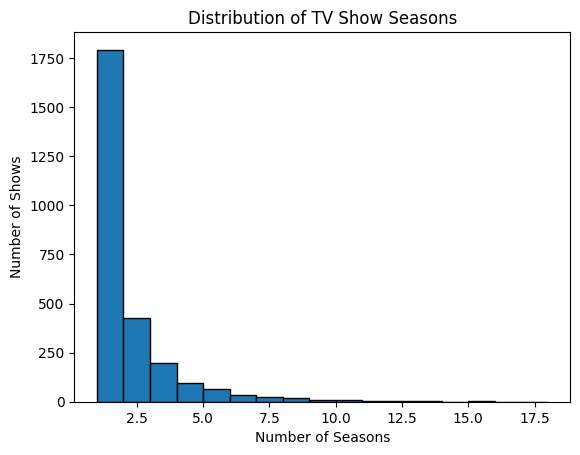

In [10]:
tv_df = df[df['type'] == 'TV Show']
tv_df['seasons'] = tv_df['duration'].str.replace(' Season', '').str.replace('s', '').astype(float)

plt.hist(tv_df['seasons'].dropna(), bins=range(1, int(tv_df['seasons'].max()) + 2), edgecolor='black')
plt.title("Distribution of TV Show Seasons")
plt.xlabel("Number of Seasons")
plt.ylabel("Number of Shows")
plt.show()

Task 8

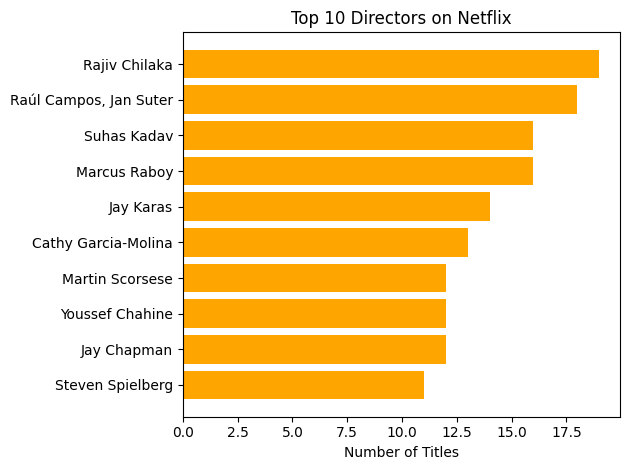

In [11]:
top_directors = df['director'].dropna().value_counts().head(10)

plt.barh(top_directors.index[::-1], top_directors.values[::-1], color='orange')
plt.title("Top 10 Directors on Netflix")
plt.xlabel("Number of Titles")
plt.tight_layout()
plt.show()

Task 9

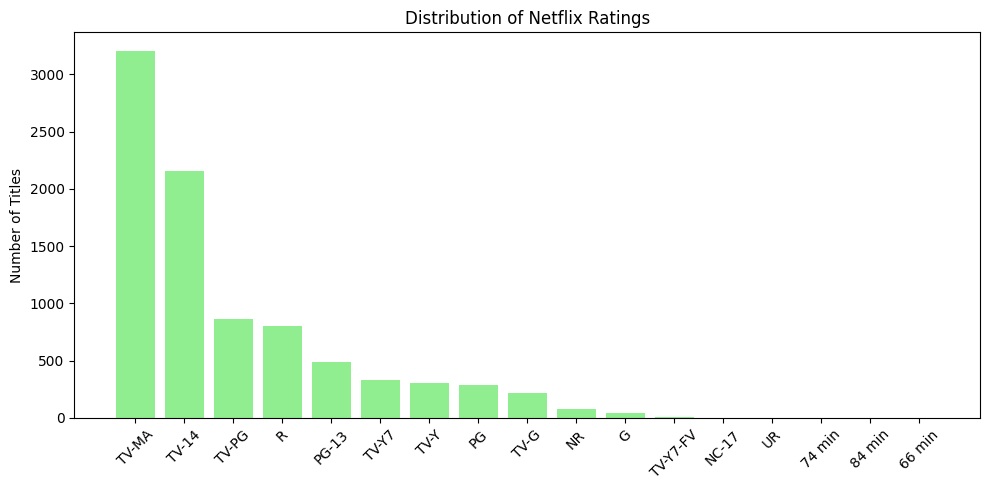

In [12]:
rating_counts = df['rating'].value_counts()

plt.figure(figsize=(10, 5))
plt.bar(rating_counts.index, rating_counts.values, color='lightgreen')
plt.title("Distribution of Netflix Ratings")
plt.xticks(rotation=45)
plt.ylabel("Number of Titles")
plt.tight_layout()
plt.show()


Task 10

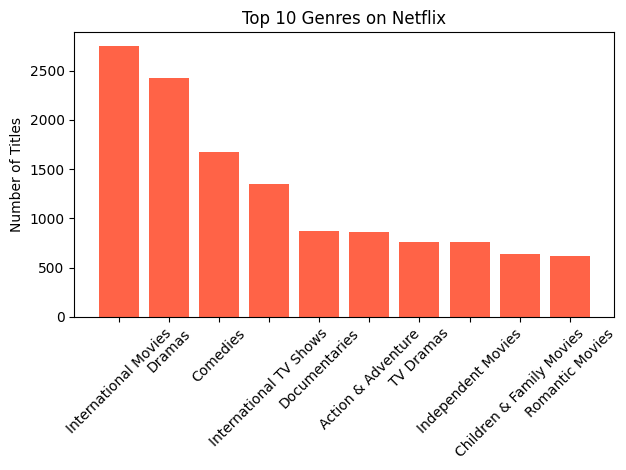

In [13]:
from collections import Counter

genre_series = df['listed_in'].dropna().apply(lambda x: [i.strip() for i in x.split(',')])
all_genres = [genre for sublist in genre_series for genre in sublist]

genre_counts = Counter(all_genres)
top_genres = dict(sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)[:10])

plt.bar(top_genres.keys(), top_genres.values(), color='tomato')
plt.title("Top 10 Genres on Netflix")
plt.xticks(rotation=45)
plt.ylabel("Number of Titles")
plt.tight_layout()
plt.show()
